# Data Analysis and Data Science
## Putting it all together 

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 8th, 2024

<hr style="border:1px solid black"> </hr>

In [1]:
### Student Name: 
print ("Nancy Aloysius")

Nancy Aloysius


Complete the following exercises and push your notebook on Github: submit your Github handle on StudiUM.

In a terminal : 

1. Go in the same directory as your notebook: `cd path_to_your_notebook/`
2. Commit the change made to your notebook: `git commit -am "add_your_personalized_note"`
3. Push your commit on Github: `git push origin main`

Go to Github and double check that the pushed Notebook is the version you want to hand in.

In [2]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white")

# Breast Cancer Subtypes Analysis [50 pts]

You are given a gene expression dataset of $N$ breast cancer patients with their clinical subtype. You wish to know if you can assess the clinical subtypes based on the gene expression. To do so you will be using various methods presented through out the class.

## Import the data [10 pts]

Your dataset concist of three files: 
1. `genes_id.txt`
2. `patient_subtype.txt`
3. `patient_expression.txt`. 

Import the various files and build your dataset daframe. You should have for each patient her/his gene expression profil and clinical subtypes. Use the gene IDs as identifier for the columns or row names (you choose how to build your dataframe).

### Import the files individually [3 pts]

In [4]:
g = pd.read_table("/u/aloysiun/code_github/datasets/genes_id.txt", header=None)
st = pd.read_table("/u/aloysiun/code_github/datasets/patient_subtype.txt", header=None)
df = pd.read_table("/u/aloysiun/code_github/datasets/patient_expression.txt", header=None, sep=" ")

print(g.head())
print(st.head())
print(df.head())

                    0
0   ENSG00000011426.9
1   ENSG00000054598.6
2  ENSG00000062038.12
3   ENSG00000077152.8
4  ENSG00000082175.13
       0
0  Basal
1  Basal
2  Basal
3  Basal
4  Basal
         0         1         2         3         4         5         6   \
0  1.326515  3.475678  2.374959  3.409941  0.014148  3.235387  0.094595   
1  1.885133  2.752910  3.770004  3.822052  0.051402  3.001023  0.241303   
2  3.246316  4.423018  3.700385  4.369893  0.155187  3.752491  0.102125   
3  2.161512  2.314358  3.562899  3.786747  0.039245  4.227823  0.493791   
4  2.795468  1.876752  0.658127  2.581386  0.014486  2.688765  0.432283   

         7         8         9   ...        37        38        39        40  \
0  4.488874  2.023978  3.996567  ...  0.415417  3.163366  1.751804  1.727270   
1  3.680198  1.820556  1.344271  ...  2.035764  2.339897  0.949565  1.967062   
2  3.779098  2.218593  1.927426  ...  1.123048  3.647681  1.063245  2.876544   
3  4.124650  2.202475  2.317170  ...  0.930

### How many patient are you considering? [1 pt]

In [5]:
print(df.shape[0], "patients are being considered")

645 patients are being considered


### How many genes are you considering? [1 pt]

In [6]:
print(g.shape[0], "we are looking at 47 different genes")

47 we are looking at 47 different genes


### Combine the data from all three files into one dataframe [5 pts]
You can use one of the dataframe as the 'main' one, and then rename its columns and add a new column.

**Show a preview/overview of your dataframe**

In [7]:
df.columns = g[0]

df.loc[:, "Clinical_subtypes"] = st.iloc[:,0]

df.head()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5,Clinical_subtypes
0,1.326515,3.475678,2.374959,3.409941,0.014148,3.235387,0.094595,4.488874,2.023978,3.996567,...,3.163366,1.751804,1.727270,4.541346,3.437507,5.678637,7.451924,0.598057,2.860720,Basal
1,1.885133,2.752910,3.770004,3.822052,0.051402,3.001023,0.241303,3.680198,1.820556,1.344271,...,2.339897,0.949565,1.967062,4.167635,3.288760,5.370061,2.870596,0.102755,3.075090,Basal
2,3.246316,4.423018,3.700385,4.369893,0.155187,3.752491,0.102125,3.779098,2.218593,1.927426,...,3.647681,1.063245,2.876544,4.498677,2.722251,3.125330,1.928449,0.374845,2.531836,Basal
3,2.161512,2.314358,3.562899,3.786747,0.039245,4.227823,0.493791,4.124650,2.202475,2.317170,...,3.071066,0.577870,2.554480,4.879861,3.597988,5.953152,3.761062,0.528845,1.604472,Basal
4,2.795468,1.876752,0.658127,2.581386,0.014486,2.688765,0.432283,2.655957,1.872897,0.924654,...,2.893713,0.272402,2.119050,3.571224,2.554718,0.189085,0.000000,0.199501,0.041927,Basal


## Explore the dataset [15 pts]

### How many subtypes are you considering? [1 pts]

In [8]:
print("we are considering", df.loc[:, "Clinical_subtypes"].nunique(), "different subtypes;", df.loc[:, "Clinical_subtypes"].unique())

we are considering 5 different subtypes; ['Basal' 'LumA' 'LumB' 'Her2' 'Normal']


### How many patients are associtated to each subtype? [2 pts]

In [9]:
df.groupby("Clinical_subtypes").count()

,ENSG00000011426.9,ENSG00000054598.6,ENSG00000062038.12,ENSG00000077152.8,ENSG00000082175.13,ENSG00000089685.13,ENSG00000091831.20,ENSG00000092621.10,ENSG00000094804.8,ENSG00000099953.8,...,ENSG00000171791.11,ENSG00000171848.12,ENSG00000173890.15,ENSG00000174371.15,ENSG00000175063.15,ENSG00000176890.14,ENSG00000186081.10,ENSG00000186847.5,ENSG00000186868.14,ENSG00000261857.5
Clinical_subtypes,,,,,,,,,,,,,,,,,,,,,
Basal,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
Her2,82,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
LumA,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
LumB,165,165,165,165,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,165
Normal,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28


In [10]:
print("Basal = 191, HER2 = 82, LumA = 179, LumB = 165, and Normal = 28")

Basal = 191, HER2 = 82, LumA = 179, LumB = 165, and Normal = 28


### Generate a graph showing the distribution of the average expression of each gene [5 pts]

In [24]:
genes = df.loc[:,"ENSG00000011426.9" : "ENSG00000261857.5"]
genes_average = genes.median(axis=0)
genes_average.count()

np.int64(47)

In [30]:
genes_average_df = pd.DataFrame(genes_average, columns=["average gene count"])
genes_average_df.shape

(47, 1)

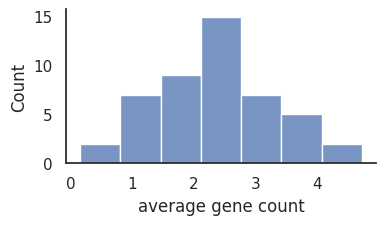

In [31]:

sns.histplot(genes_average_df, x="average gene count")
sns.despine()

### What are the two genes with the largest standard deviation for all patient? [2 pts]
To answer this question, you can use the `df.std()` and `df.sort_values()`. You can look into the doc for more informations on these two functions.
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html
2. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values

### Compare the expression of these two genes: are they corrolated based on tumor subtypes? [5 pts]
The two genes to consider are **ENSG00000186081.10** and **ENSG00000128422.14**.

To answer this question: 
1. Make a figure showing the correlation between the two genes by clinical subtypes,
2. Calculate a correlation coefficient for each comparison and,
3. Briefly interpret your results (make sure your interpretation is consistent with the correlation coefficient used).

## Clustering [25 pts]
You are wondering if the M genes considered by your dataset are enough to cluster the N patients by their cancer subtype. To answer this question, you first want to apply a dimensionality reduction algorithm to your dataset. You then want to apply a clustering alogirthme to the reduced components, and compare the clustering labels to the clinical subtype of each patient.

### Apply a PCA Dimensionality reduction to your gene expression dataset [4 pts]

Once you selected the numerical gene expression, scale the value and initiate a PCA object. You want to reduce your set of features to **25 components**.

### What percentage of the variance of the dataset is explained by the two first component? [2 pt]

### Apply the PCA onto your gene expression data and create a DataFrame with the PCs and the clinical patient subtypes [4 pts]
**Show a preview/overview of your dataframe**

### Plot a figure showing the two first PCs and color the samples by their clinical subtype [3 pts]
Do you think the k-means algorithm will be able to accurately cluster patients based on their clinical subtype? Why?

### Apply the K-means algorithme to your reduced dataset [5 pts]
When applying the K-means, you should use all 25 PCs, generated by your PCA. Add the k-means labels to your reduced dataset.

### What value of k did you use and why? [2 pt]

### Compare your k-means labels to the clinical substypes [5 pts]
You comparison can by qualitative and/or quantitative.

**Are you able to cluster patient by clinical substypes from your subset of gene expressions? Briefly describe and interpret your results.**